# Homework 2
## Name: 常鑫磊
## ID:1801212779

# Problem 1

### 1. Implement a function closed_form_1 that computes this closed form solution given the features 𝐗, labels Y (using Python or Matlab).


In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
df_1 = pd.read_csv("climate_change_1.csv",header = 0)
df_2 = pd.read_csv("climate_change_2.csv",header = 0)
training_set = df_1[df_1.Year<=2006]
testing_set = df_1[df_1.Year>=2006]

In [215]:
n_samples = len(training_set)
Y=training_set.values[:,-1]
constant = np.ones(n_samples)
X=np.insert(training_set.values[:,2:-1],0,constant,axis=1)

In [217]:
def closed_form_1(x,y):
    beta = np.linalg.inv(x.T@x)@x.T@y
    return beta

beta = closed_form_1(X,Y)
beta

array([-1.24594261e+02,  6.42053134e-02,  6.45735927e-03,  1.24041896e-04,
       -1.65280033e-02, -6.63048889e-03,  3.80810324e-03,  9.31410838e-02,
       -1.53761324e+00])

### 2.Write down the mathematical formula for the linear model and evaluate the model R2 on the training set and the testing set.
The mathematical formula for the linear model is
* $$y=X\beta+\epsilon$$

The formula of $R^2$ is
* $$R^2 = \frac{\Sigma_i(\hat y_i-\bar y_i)^2}{\Sigma_i(y_i-\bar y_i)^2}$$

In [241]:
def R_squared(x,y,beta):
    SSR = np.var(x@beta)*len(x)
    SST = np.var(y)*len(x)
    return SSR/SST

R_squared(X,Y,closed_form_1(X,Y))

0.7508932772525233

In [244]:
n_samples = len(testing_set)
Y_test=testing_set.values[:,-1]
constant = np.ones(n_samples)
X_test=np.insert(testing_set.values[:,2:-1],0,constant,axis=1)

R_squared(X_test,Y_test,closed_form_1(X,Y))

print("R_squared of training_data is", R_squared(X,Y,closed_form_1(X,Y)))
print("R_squared of testing_data is", R_squared(X_test,Y_test,closed_form_1(X,Y)))


R_squared of training_data is 0.7508932772525233
R_squared of testing_data is 0.25042289711229276


### 3.Which variables are significant in the model?

In [245]:
def t_test(x,y):
    sum_error = (y-x@closed_form_1(x,y)).T@(y-x@closed_form_1(x,y))
    n = np.shape(x)[0]
    k = np.shape(x)[1]
    var_beta = sum_error/(n-k)*np.diag(np.linalg.inv(X.T@X))
    t = closed_form_1(x,y)/np.sqrt(var_beta)
    return t

In [246]:
t_test(X,Y)

array([-6.26517396,  9.923226  ,  2.8264197 ,  0.2404694 , -1.92972604,
       -4.07783387,  3.75729271,  6.31256095, -7.21030085])

In [247]:
t_test(X,Y)<2

array([ True, False, False,  True,  True,  True, False, False,  True])

# Problem2

### 1. Please write down the loss function for linear model with L1 regularization, L2 regularization, respectively.
* The loss function with $L_1$ regularization $$L=(Y-X\beta)'(Y-X\beta)+\lambda||\beta||_1$$
* The loss function with $L_2$ regularization $$L=(Y-X\beta)'(Y-X\beta)+\lambda ||\beta||_2^2$$


### 2.The closed form solution for linear model with L2 regularization:
$$\theta = (X^TX+\lambda I)^{-1}X^TY$$ 
### where I is the identity matrix. Write a function closed_form_2 that computes this closed form solution given the features X, labels Y and the regularization parameter $\lambda$

In [203]:
def closed_form_2(x,y,lam):
    lam_mat = lam*np.eye(x.shape[1])
    lam_mat[0,0] = 0
    beta = np.linalg.inv(x.T@x+lam_mat)@x.T@y
    return beta

closed_form_2(X,Y,10)


array([-8.08439685e+01,  4.48393633e-02,  8.41756269e-03,  2.58313240e-04,
       -1.76472998e-02, -6.80438552e-03,  3.74782755e-03,  6.07197938e-02,
       -2.68981314e-02])

### 3.Compare the two solutions in problem 1 and problem 2 and explain the reason why linear model with L2 regularization is robust. (using climate_change_1.csv)

In [207]:
beta_L2 = closed_form_2(X,Y,10)
beta = closed_form_2(X,Y,0)

print("L2 coeffcient:",beta_L2)
print("no punishment coefficient:",beta)

L2 coeffcient: [-8.08439685e+01  4.48393633e-02  8.41756269e-03  2.58313240e-04
 -1.76472998e-02 -6.80438552e-03  3.74782755e-03  6.07197938e-02
 -2.68981314e-02]
no punishment coefficient: [-1.24594261e+02  6.42053134e-02  6.45735927e-03  1.24041896e-04
 -1.65280033e-02 -6.63048889e-03  3.80810324e-03  9.31410838e-02
 -1.53761324e+00]


We can see under L2 regularization, most of coefficient are shrinked compared to the no regularization formula, which can prevent overfiting, thus the linear model with L2 regularization is robust

### 4. You can change the regularization parameter λ to get different solutions for this problem. Suppose we set λ = 10, 1, 0.1, 0.01, 0.001, and please evaluate the model R2 on the training set and the testing set. Finally, please decide the best regularization parameter $\lambda$.

$\lambda$ = 0.01 is best

# Problem3

### 1. From Problem 1, you can know which variables are significant, therefore you can use less variables to train model. For example, remove highly correlated and redundant features. You can propose a workflow to select feature.

1. Remove the highly correlated variable first.
2. Run regression, remove the insignificant variables step by step

# Problem 4

**Gradient descent algorithm is an iterative process that takes us to the minimum of a function. Please write down the iterative expression for updating the solution of linear model and implement it using Python or Matlab in gradientDescent function.**
* Batch based gradient descent iterative formula is$$\beta_n = \beta_{n-1} -\frac{\alpha}{m} X'(X\beta -y)$$


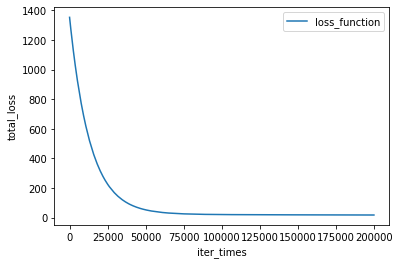

The final loss is  18.053454488251507


Month      -0.255301
MEI        -0.133413
CO2        -0.039745
CH4        -0.059796
N2O         0.166380
CFC-11      0.036993
CFC-12      0.169644
TSI         0.456629
Aerosols    0.671386
Constant    0.325425
Name: correlation coefficient, dtype: float64

In [238]:
from sklearn import preprocessing

train_data = df_1.loc[:2006,:]

def loss(coeff,x,y):
    return (x@coeff-y).T@(x@coeff-y)

def gradientDescent(x,y,iter_max=200000, batch=100,alpha=1e-5,
                     min_gap=1e-1,constant=True):
    record = []
    if constant:
        x["Constant"]=1
    columns = x.columns
    x = np.matrix(x)
    y = np.matrix(y).T
    coeff = np.matrix(np.arange(x.shape[1])/x.shape[1]).T

    for i in range(iter_max):
        idx = np.random.choice(x.shape[0],batch)
        x_batch = x[idx,:]
        y_batch = y[idx,:]
        iteration = alpha/batch*(x_batch.T@(x_batch@coeff-y_batch))
        if np.abs(iteration.A1).all() < min_gap:
            print("iteration terminal at %s times"%i)
            break
        else:
            coeff = coeff - iteration
            record.append(loss(coeff,x,y)[0,0])
            
    plt.plot(record, label = "loss_function")
    plt.ylabel("total_loss")
    plt.xlabel("iter_times")
    plt.legend()
    plt.show()
    
    print("The final loss is ", record[-1])
    result = pd.Series(coeff.A1, index=columns, name="correlation coefficient")
    return result

min_max_scaler = preprocessing.MinMaxScaler()
scaled_train = min_max_scaler.fit_transform(train_data.iloc[:,1:].values)
scaled_train = pd.DataFrame(scaled_train, columns = train_data.columns[1:])
result = gradientDescent(scaled_train.iloc[:,:-1], scaled_train.Temp)
result